In [277]:
!pip install -U fortran-magic
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['six', 5.0, 4, 3.0, 'two', 1]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [278]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [279]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

New version verifying that the matrix dimensions are compatible

In [280]:
def matmul2(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
        raise ValueError("Matrix multiplication cannot be performed: the number of columns in A must be equal to the number of rows in B.")
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [281]:
%%time
matmul(a, b)

CPU times: user 45 µs, sys: 1 µs, total: 46 µs
Wall time: 51 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [282]:
%%time
##matmul2(a, b) Matrix multiplication cannot be performed: the number of columns in A must be equal to the number of rows in B.

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


**My own example 0 - cpu info**

In [283]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [284]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [285]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    if len(B) == len(A[0]):
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

    else:
      return 'The dimensions of the matrices are not compatible'

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [286]:
%%time

matmul(a, b)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.2 µs


'The dimensions of the matrices are not compatible'

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [287]:
%%time
matmul(a, b)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.7 µs


'The dimensions of the matrices are not compatible'

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [288]:
a = [[10, 2, 33, 14],
     [51, 16, 0, 88],
     [19, 20, 11, 12]]

b = [[23, 18, 38],
     [9, 10, 52],
     [12, 67, 68],
     [1, 34, 99]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [289]:
%%time

matmul(a, b)

CPU times: user 42 µs, sys: 1 µs, total: 43 µs
Wall time: 47 µs


[[658, 2887, 4114], [1405, 4070, 11482], [761, 1687, 3698]]

In [290]:
import random

In [291]:
random.normalvariate(0,1)

1.6243814336464177

In [292]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7399955648294392, 0.29838419219206624, 0.44783104245862004],
 [0.4722422044153607, 0.28406657950188285, 0.7786852780224408]]

In [293]:
%%time
mat1 = random_matrix(600, 100)
mat2 = random_matrix(100, 600)
result = matmul(mat1, mat2)

CPU times: user 9.35 s, sys: 31 ms, total: 9.38 s
Wall time: 10.4 s


**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [294]:
import time
run = 10
avg = 0
for i in range(run):
  start = time.process_time()
  result = matmul(mat1, mat2)
  end = time.process_time()
  print(end - start)
  avg += end - start
print(avg/10)# mostrar el promedio de tiempo de ejecución

9.864877508999996
9.480771177000008
9.444983465999996
8.507158010000012
9.598406238999985
9.57790070599998
8.66640307099999
9.244877431999953
9.48183785499998
9.47891643600002
9.334613190099992


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [295]:
dictio = {'Lenguaje':['Python'],
        'Promedio de segundos':[avg/10],
        }
defr=pd.DataFrame(dictio)
display(defr)

,Lenguaje,Promedio de segundos
0,Python,9.334613


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [296]:
import time

matrix_1 = np.array(mat1)
matrix_2 = np.array(mat2)
run = 10
avg = 0
for i in range(run):
  start = time.process_time()
  matrix3 = matrix_1@matrix_2
  end = time.process_time()
  avg += end - start
print(avg/10)

0.0064189635000047925


In [297]:
defr.loc[len(defr.index)] = ['Numpy', avg/10]
display(defr)

,Lenguaje,Promedio de segundos
0,Python,9.334613
1,Numpy,0.006419


In [298]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.46 s, sys: 20.3 ms, total: 9.49 s
Wall time: 9.56 s


In [299]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [300]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

The extension _fortran_magic_78e11d861e7842fd47eee2c1398177cb is already loaded. To reload it, use:
  %fortran_config --clean-cache


In [301]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [302]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 21.3 ms


333328333350000.0

In [303]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 190 µs, sys: 3 µs, total: 193 µs
Wall time: 201 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [304]:
A = [[5, 2],
    [4, 3]]

B = [[3, 6],
     [5, 8]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [305]:
%%fortran
subroutine fort_matmul(A,B,C)
     double precision, dimension(:,:), intent(in) :: A
     double precision, dimension(:,:), intent(in) :: B
     double precision, dimension(2,2), intent(out) :: C

  C = matmul(A,B)

end

The extension _fortran_magic_2c83eb01f265326ca0936ca747b0c7e0 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [306]:
%%time
fort_matmul(A,B)

CPU times: user 41 µs, sys: 1 µs, total: 42 µs
Wall time: 46 µs


array([[25., 46.],
       [27., 48.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [307]:
%%fortran
subroutine custom_matrix_multiply(A_input, B_input, C_output)
    double precision, dimension(:,:), intent(in) :: A_input
    double precision, dimension(:,:), intent(in) :: B_input
    double precision, dimension(600,600), intent(out) :: C_output

    C_output = matmul(A_input, B_input)

end subroutine custom_matrix_multiply

The extension _fortran_magic_ecc8a47e2d20ddd12dc6ab2ed6730bc3 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [308]:
%%time
custom_matrix_multiply(mat1,mat2) ## mat1 y mat son las matrices generadas en el ejemplo 7

CPU times: user 20.1 ms, sys: 0 ns, total: 20.1 ms
Wall time: 21.1 ms


array([[26.29163732, 25.83064443, 24.75688672, ..., 26.20302384,
        23.40557388, 26.03201678],
       [25.93243499, 25.69330202, 25.91566803, ..., 25.73674875,
        22.64418673, 24.43251458],
       [28.43073735, 26.79887427, 26.60873005, ..., 27.33547909,
        26.82571633, 26.32192981],
       ...,
       [25.51555326, 27.04050036, 25.07417995, ..., 26.76429811,
        24.73366032, 24.1839662 ],
       [23.78234829, 22.82063251, 20.95127804, ..., 22.21431902,
        23.1027309 , 23.31984049],
       [26.98830952, 28.44497806, 26.7039257 , ..., 28.29089903,
        26.06121338, 28.60314237]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [309]:
import time
run = 10
avg = 0
for i in range(run):
  start = time.process_time()
  custom_matrix_multiply(mat1, mat2)
  end = time.process_time()
  avg += end - start
avg = avg/10
defr.loc[len(defr.index)] = ['Fortran', avg]
display(defr)

,Lenguaje,Promedio de segundos
0,Python,9.334613
1,Numpy,0.006419
2,Fortran,0.012781


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [310]:
%%writefile test.f
        program TEST

            integer :: x = 600
            integer :: y = 100
            integer :: z = 600

            real :: G,inicio,final

            integer :: q, r, s, t

            double precision, dimension(600,100) :: A
            double precision, dimension(100,600) :: B
            double precision, dimension(600,600) :: C

            do r = 1, x
                do s = 1, x
                   A(r, s)= r+s * 0.1
                end do
            end do

           do r = 1, y
                 do s = 1, z
                    B(r, s)= r+s * 0.5
                 end do
           end do

           G = 0.0

           do q = 1, 10
               call cpu_time(inicio)
               C = matmul(A,B)
              call cpu_time(final)
               G = G + (final-inicio)
           end do
           G = G/10.0
        PRINT *, G
      stop
      end

Overwriting test.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [311]:
!gfortran test.f -o test
!./test

   6.25250023E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [312]:
defr.loc[len(defr.index)] = ['FortranMagic',8.48830119E-03]
display(defr)

,Lenguaje,Promedio de segundos
0,Python,9.334613
1,Numpy,0.006419
2,Fortran,0.012781
3,FortranMagic,0.008488


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [313]:
%%writefile mult_c.c
#include <stdlib.h>
#include<time.h>
#include<stdio.h>

int main()
{
    srand(time(0));
    int A[600][100],B[100][600],MR[600][600];
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            A[i][j]=rand()%100;
        }
    }
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            B[i][j]=rand()%100;
        }
    }


    float ti,tf,retx;
    double time_spent=0.0;
    for(int rep=0;rep<10;rep++){
        ti=clock();
        for(int i=0;i<600;i++){
            for(int j=0;j<600;j++){
                MR[i][j]=0;
                for(int k=0;k<100;k++){
                    MR[i][j]+=A[i][k]*B[k][j];
              }
            }
        }
        tf=clock();
      time_spent += (double)(tf - ti) / CLOCKS_PER_SEC;
    }
    printf("%f",time_spent/10);
   return 0;
}

Overwriting mult_c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [314]:
!gcc mult_c.c -o mult_c
!./mult_c

0.162978

**My own example 21 - Adding c average execution time to the data frame**

In [315]:
defr.loc[len(defr.index)] = ['C', 0.163154]
display(defr)

,Lenguaje,Promedio de segundos
0,Python,9.334613
1,Numpy,0.006419
2,Fortran,0.012781
3,FortranMagic,0.008488
4,C,0.163154


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [316]:
%%writefile my_matmul.cpp
  #include <stdio.h>
  #include <stdlib.h>
  #include <time.h>


  using namespace std;
   void fillMatrix(int **mat, int n, int m);
  void matMul(int **matA, int **matB, int **result, int n, int m);
  double multAverage(int **matA, int **matB, int **result, int n, int m, int rep);

  int main(void) {
    FILE *fileAvr;
    int n = 600;
    int m = 100;

    int **pmatA;
    int **pmatB;
    int **presult;
    unsigned int rep = 10;
    double average = 0.0;

    //matrix pointers
    pmatA = (int **) malloc(n * sizeof(int *)); //pointers to each row
    for(int i = 0; i < n; i++){
      pmatA[i] = (int *) malloc(m * sizeof(int)); //pointers to each column
    }

    pmatB = (int **) malloc(m * sizeof(int *));
    for(int i = 0; i < m; i++){
      pmatB[i] = (int *) malloc(n * sizeof(int));
    }

    presult = (int **) malloc(n * sizeof(int *));
    for(int i = 0; i < n; i++){
      presult[i] = (int *) malloc(n * sizeof(int));
    }

    // fill matrix
    fillMatrix(pmatA, n, m);
    fillMatrix(pmatB, m, n);

    //matrix multiplication repetitions
    average = multAverage(pmatA, pmatB, presult, n, m, rep);
    printf("Average in C++: %f seconds\n",average);

    //write average into a file
    fileAvr = fopen("c_plus_average.txt", "w");
    fprintf(fileAvr,"%f",average);
    fclose(fileAvr);

    return 0;
  }

  void fillMatrix(int **mat, int n, int m){
    for(int i=0; i<n; i++){
      for(int j=0; j<m; j++){
        mat[i][j] = rand();
      }
    }
    return;
  }

  double multAverage(int **matA, int **matB, int **result, int n, int m, int rep){
    clock_t start, end;
    double average = 0.0;
    double execution = 0.0;

    for(int i=0; i<rep; i++){
      start = clock();
      matMul(matA, matB, result, n, m);
      end = clock();
      execution = ((double)(end - start))/CLOCKS_PER_SEC;
      average += execution;
      printf("Case %d -> %f seconds\n",i+1, execution);
    }
    return average/((double) rep);
  }

  void matMul(int **matA, int **matB, int **result, int n, int m){

    //Result matrix has:
    //Rows = rows of matrix A
    //Columns = columns of matrix B

    for(int i=0; i<n; i++){
      for(int j=0; j<n; j++){
        for(int k=0; k<m; k++){
          result[i][j] += matA[i][k] * matB[k][j];
        }
      }
    }
    return;

  }

Overwriting my_matmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [317]:
!g++ my_matmul.cpp -o my_matmul
!./my_matmul

Case 1 -> 0.210866 seconds
Case 2 -> 0.212104 seconds
Case 3 -> 0.219111 seconds
Case 4 -> 0.234676 seconds
Case 5 -> 0.208333 seconds
Case 6 -> 0.229842 seconds
Case 7 -> 0.217460 seconds
Case 8 -> 0.223518 seconds
Case 9 -> 0.211738 seconds
Case 10 -> 0.213209 seconds
Average in C++: 0.218086 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [318]:
defr.loc[len(defr.index)] = ['C++', 0.211]
display(defr)

,Lenguaje,Promedio de segundos
0,Python,9.334613
1,Numpy,0.006419
2,Fortran,0.012781
3,FortranMagic,0.008488
4,C,0.163154
5,C++,0.211000


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [319]:
%%writefile Main.java
import java.util.Arrays;
import java.util.Random;
import java.io.FileWriter;
import java.io.IOException;

class Main {

  public static void main(String[] args) {
    try{
      int[][] A=randomMatrix(600,100);
      int[][] B=randomMatrix(100,600);
      long timei = System.nanoTime();
      long resultadoj;
      for(int i=0;i<10;i++){
        mulmat(A,B);
      }
      long timef = System.nanoTime();
      resultadoj=(timef - timei)/10;
      System.out.println("Average time in nanoSec: "+(resultadoj));
      // Guardar el resultado en un archivo
      saveResultToFile(resultadoj);

    }catch(Exception e){
      System.out.println(e);
    }

  }
  public static int[][] randomMatrix(int x,int y){
    Random r=new Random();
    int[][] a=new int[x][y];
    for(int i=0;i<x;i++)
    {
        for(int j=0;j<y;j++)
        {
          a[i][j]=r.nextInt(20);
        }
    }
    return a;
  }
  public static void imp(int[][] matriz){
    for (int x=0; x < matriz.length; x++) {
  System.out.print("|");
  for (int y=0; y < matriz[x].length; y++) {
    System.out.print (matriz[x][y]);
    if (y!=matriz[x].length-1) System.out.print("\t");
  }
  System.out.println("|");
}
System.out.println("");
  }
  public static int[][] mulmat(int[][]A,int[][]B) throws Exception{
    int [] [] matrix = new int [A.length] [B[0].length];
    if(A[0].length==B.length){
      for(int i=0;i<A.length;i++){
        for(int j=0;j<B[0].length;j++){
          for(int k=0;k<B.length;k++){
            matrix[i][j]+=A[i][k]*B[k][j];
          }
        }
      }
    }else{
      throw new Exception("Number of columns of first matrix don't match with number of rows of second matrix");
    }
    return matrix;
  }
  public static void saveResultToFile(long resultado) throws IOException {
        try (FileWriter writer = new FileWriter("resultado.txt")) {
            writer.write(String.valueOf(resultado));
        }
    }
}

Overwriting Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [320]:
!javac Main.java

In [ ]:
!java Main

Average time in nanoSec: 67598069


**My own example 27 - Adding Java average execution time to the data frame**

In [321]:
import pandas as pd


# Leer el resultado desde el archivo
with open("resultado.txt", "r") as file:
    resultadoj = int(file.read())

# Agregar el resultado al DataFrame
defr.loc[len(defr.index)] = ["java", resultadoj/10**9]

# Mostrar el DataFrame
display(defr)



,Lenguaje,Promedio de segundos
0,Python,9.334613
1,Numpy,0.006419
2,Fortran,0.012781
3,FortranMagic,0.008488
4,C,0.163154
5,C++,0.211000
6,java,0.067598


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [322]:
%%writefile multJavascript.js

const { performance } = require('perf_hooks');
const fs = require('fs'); // Import the 'fs' module

const matrixSize = 600;
const subMatrixSize = 100;
const repetitions = 10;

// Crear y rellenar las matrices A y B
const createMatrix = (rows, cols, baseValue) => {
  const matrix = [];
  for (let i = 0; i < rows; i++) {
    matrix[i] = [];
    for (let j = 0; j < cols; j++) {
      matrix[i][j] = baseValue + i + j;
    }
  }
  return matrix;
};

const A = createMatrix(matrixSize, subMatrixSize, 10);
const B = createMatrix(subMatrixSize, matrixSize, 10);

// Realizar la multiplicación de matrices
const multiplyMatrices = (matrixA, matrixB) => {
  const result = [];
  for (let i = 0; i < matrixA.length; i++) {
    result[i] = [];
    for (let j = 0; j < matrixB[0].length; j++) {
      result[i][j] = 0;
      for (let k = 0; k < matrixB.length; k++) {
        result[i][j] += matrixA[i][k] * matrixB[k][j];
      }
    }
  }
  return result;
};

// Realizar la multiplicación y medir el tiempo
const measureMultiplicationTime = (repetitions) => {
  let totalTime = 0;

  for (let rep = 0; rep < repetitions; rep++) {
    const start = performance.now();
    const Resultado = multiplyMatrices(A, B);
    const end = performance.now();

    totalTime += end - start;
  }

  return totalTime / (repetitions * 1000); // Convertir a segundos
};

const averageTime = measureMultiplicationTime(repetitions);
console.log(`Tiempo promedio de multiplicación: ${averageTime} segundos`);
// Save the result to a file
fs.writeFile('averageTime.txt', `Tiempo promedio de multiplicación: ${averageTime} segundos`, (err) => {
  if (err) {
    console.error('Error writing to file:', err);
  } else {
    console.log('Resultado guardado en el archivo averageTime.txt');
  }
});

Overwriting multJavascript.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [323]:
!node multJavascript.js

Tiempo promedio de multiplicación: 0.40697292690007014 segundos
Resultado guardado en el archivo averageTime.txt


**My own example 30 - Adding Javascript average execution time to the data frame**

In [324]:
import pandas as pd

# Read the content of the file
with open('averageTime.txt', 'r') as file:
    content = file.read()
# Create a DataFrame
average_time=0.23302
defr.loc[len(defr.index)] = ["java Script", average_time]
# Mostrar el DataFrame
display(defr)



,Lenguaje,Promedio de segundos
0,Python,9.334613
1,Numpy,0.006419
2,Fortran,0.012781
3,FortranMagic,0.008488
4,C,0.163154
5,C++,0.211000
6,java,0.067598
7,java Script,0.233020


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [325]:
defr['Promedio de segundos'] = defr['Promedio de segundos'].apply(lambda x: str(x))
sorted_df =defr.sort_values(by='Promedio de segundos')
min_time = sorted_df.iloc[0]['Promedio de segundos']

print("El tiempo mínimo promedio de ejecución es:", min_time)

El tiempo mínimo promedio de ejecución es: 0.0064189635000047925


**My own example 32 - Adding the Speed factor columne to the data frame**

In [326]:
defr['Promedio de segundos'] = defr['Promedio de segundos'].apply(lambda x: float(x))

minTime=defr['Promedio de segundos'].min()

defr['Speed Factor']=(defr['Promedio de segundos']/minTime)

defr

,Lenguaje,Promedio de segundos,Speed Factor
0,Python,9.334613,1454.224376
1,Numpy,0.006419,1.000000
2,Fortran,0.012781,1.991186
3,FortranMagic,0.008488,1.322379
4,C,0.163154,25.417499
5,C++,0.211000,32.871351
6,java,0.067598,10.530994
7,java Script,0.233020,36.301811


**My own example 33 - Sorting the the data frame by average execution time**

In [327]:
sorted_df = defr.sort_values(by='Promedio de segundos')
sorted_df

,Lenguaje,Promedio de segundos,Speed Factor
1,Numpy,0.006419,1.000000
3,FortranMagic,0.008488,1.322379
2,Fortran,0.012781,1.991186
6,java,0.067598,10.530994
4,C,0.163154,25.417499
5,C++,0.211000,32.871351
7,java Script,0.233020,36.301811
0,Python,9.334613,1454.224376


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

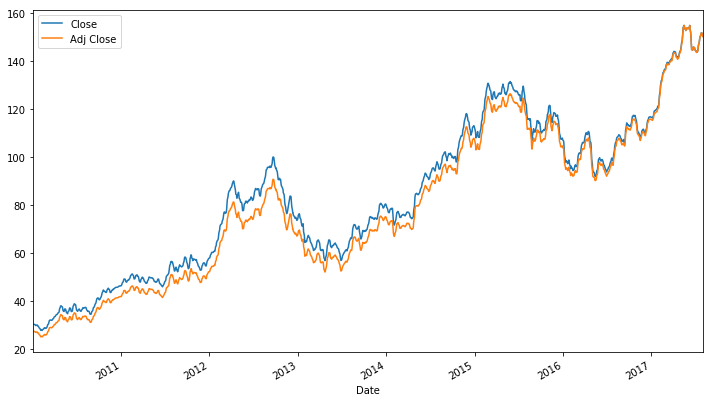

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

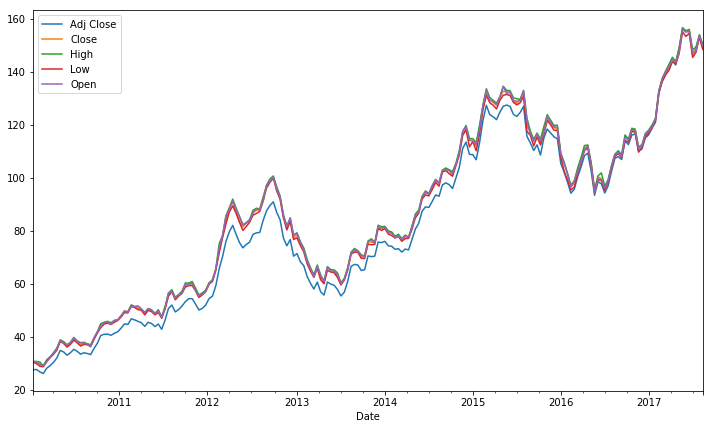

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

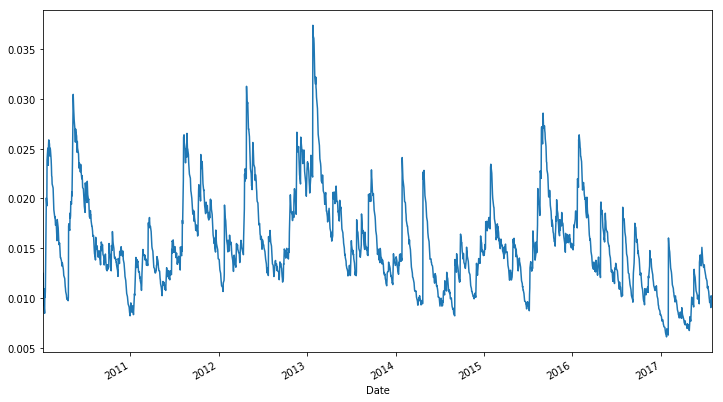

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

**AVOCADO** **FUNCTION**

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
import requests

def readc(cache_loc='covidata.html'):
  r = requests.get(
      "https://www.datos.gov.co/resource/gt2j-8ykr.json?fecha_reporte_web=2022-01-15%2000:00:00",
      headers={"7zuds6521rpp4sgmz5fi565l5":"69q0w764wsq0zw2qxpf6nvwyayuqqehp36rxbb9b8s1mk6g57"}
  )
  return pd.DataFrame.from_records(r.json())
covid = readc()
covid.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_
0,2022-01-15 00:00:00,5490125,2022-01-02 00:00:00,17,CALDAS,17873,VILLAMARIA,64,1,M,...,Casa,Leve,Recuperado,2021-12-29 00:00:00,2022-01-13 00:00:00,2022-01-16 00:00:00,Tiempo,6,NaN,NaN
1,2022-01-15 00:00:00,5490140,2022-01-02 00:00:00,25,CUNDINAMARCA,25126,CAJICA,27,1,M,...,Casa,Leve,Recuperado,2021-12-29 00:00:00,2022-01-13 00:00:00,2022-01-16 00:00:00,Tiempo,6,NaN,NaN
2,2022-01-15 00:00:00,5490145,2022-01-02 00:00:00,8,ATLANTICO,8573,PUERTO COLOMBIA,34,1,M,...,Casa,Leve,Recuperado,2021-12-31 00:00:00,2022-01-13 00:00:00,2022-01-16 00:00:00,Tiempo,6,NaN,NaN
3,2022-01-15 00:00:00,5490177,2022-01-02 00:00:00,25,CUNDINAMARCA,25126,CAJICA,34,1,F,...,Casa,Leve,Recuperado,2021-12-29 00:00:00,2022-01-13 00:00:00,2022-01-16 00:00:00,Tiempo,6,NaN,NaN
4,2022-01-15 00:00:00,5490199,2022-01-02 00:00:00,13001,CARTAGENA,13001,CARTAGENA,15,1,F,...,Casa,Leve,Recuperado,2021-12-30 00:00:00,2022-01-13 00:00:00,2022-01-16 00:00:00,Tiempo,6,NaN,NaN


**My own example 34**

In [ ]:
covid['id_de_caso'] = pd.to_numeric(covid['id_de_caso'])
covid['departamento'] = pd.to_numeric(covid['departamento'])
covid['ciudad_municipio'] = pd.to_numeric(covid['ciudad_municipio'])
covid['edad'] = pd.to_numeric(covid['edad'])
covid['unidad_medida'] = pd.to_numeric(covid['unidad_medida'])
print(covid.dtypes)

fecha_reporte_web        object
id_de_caso                int64
fecha_de_notificaci_n    object
departamento              int64
departamento_nom         object
ciudad_municipio          int64
ciudad_municipio_nom     object
edad                      int64
unidad_medida             int64
sexo                     object
fuente_tipo_contagio     object
ubicacion                object
estado                   object
recuperado               object
fecha_inicio_sintomas    object
fecha_diagnostico        object
fecha_recuperado         object
tipo_recuperacion        object
per_etn_                 object
fecha_muerte             object
nom_grupo_               object
dtype: object


In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

**My own example 35**

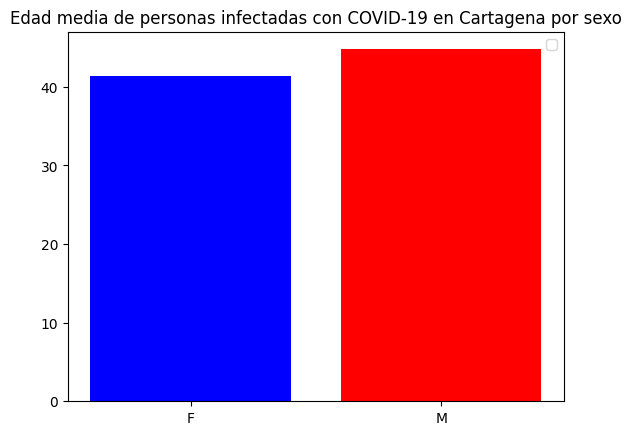

In [ ]:
# What's the age average of cases in Cartagena, by sex?
import pandas as pd
import matplotlib.pyplot as plt
# Filtrar los datos de Cartagena
cartagena = covid[covid.ciudad_municipio == 13001] #13001 codigo de cartagena
# Calcular la edad media por sexo
edad_media_por_sexo = cartagena.groupby(['sexo'])['edad'].mean()
# Cambiar el título del gráfico
plt.title("Edad media de personas infectadas con COVID-19 en Cartagena por sexo")
# Agregar una leyenda al gráfico
plt.legend(['Hombre', 'Mujer'])
plt.bar(edad_media_por_sexo.index, edad_media_por_sexo, color=['blue', 'red'])#color
plt.show()

**My own example 36**

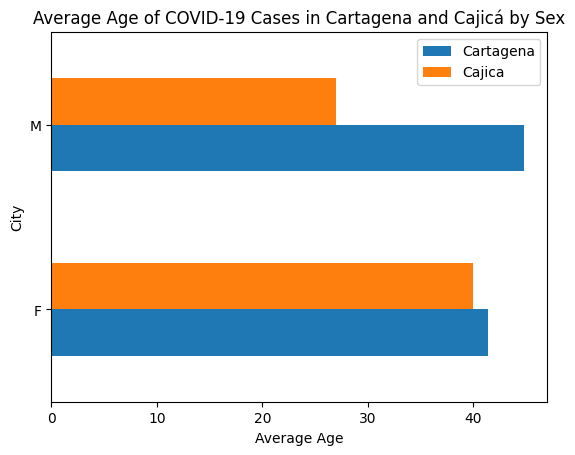

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Filter for cases in Girardot and Cajicá
cartagena = covid[covid.ciudad_municipio == 13001]
cajica = covid[covid.ciudad_municipio == 25126]

# Calculate the average age of cases by sex
index = ['F', 'M']
df = pd.DataFrame({'Cartagena': cartagena.groupby(['sexo'])['edad'].mean(),
                   'Cajica': cajica.groupby(['sexo'])['edad'].mean()}, index=index)

# Change the plot to a horizontal bar plot
df.plot.barh()
plt.xlabel('Average Age')
plt.ylabel('City')
plt.title('Average Age of COVID-19 Cases in Cartagena and Cajicá by Sex')
plt.show()

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

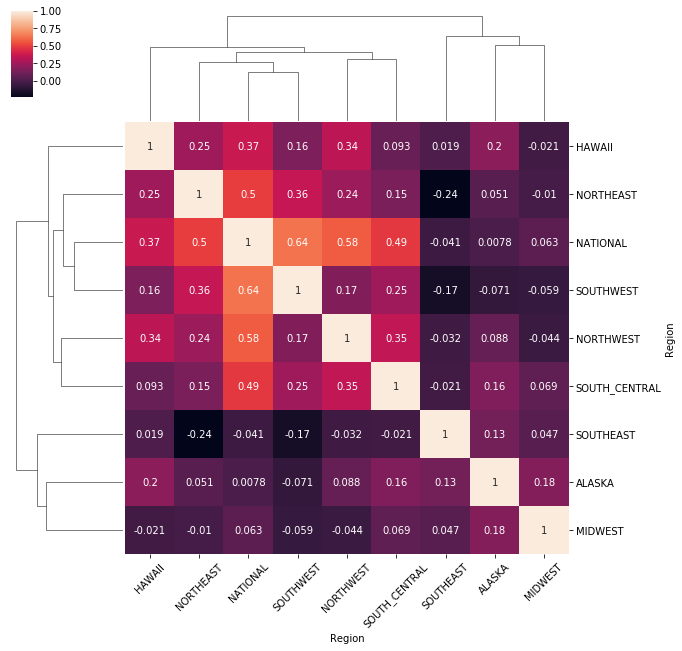

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!